In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from log_reg import *

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(precision=3)

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [145]:
# First we preprocess the X sets then we add the column of ones
X_train= min_max_scale(X_train)
X_test = min_max_scale(X_test)

# X_train= standaradize(X_train)
# X_test = standaradize(X_test)

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [146]:
theta = np.random.random(size=X_train.shape[1])
theta

array([0.471, 0.981, 0.74 , 0.118, 0.757, 0.095, 0.027, 0.404, 0.994,
       0.175, 0.673, 0.173, 0.725, 0.505, 0.68 , 0.203, 0.746, 0.996,
       0.666, 0.493, 0.923, 0.016, 0.73 , 0.889, 0.062, 0.45 , 0.205,
       0.567, 0.65 , 0.303, 0.46 ])

In [147]:
theta, loss = gradient_descent(X_train, y_train, theta, .3, 40_000)
theta

array([ 19.009,  -0.421,  -3.758,  -1.421,  -2.68 ,  -0.863,   2.184,
        -6.851,  -7.582,   1.018,   2.521, -12.174,   0.675,  -8.661,
        -6.454,  -2.032,   7.062,   1.213,  -1.32 ,   2.866,   3.143,
        -7.896,  -5.013,  -5.969,  -7.303,  -3.82 ,   1.102,  -4.819,
        -4.577,  -5.782,  -2.188])

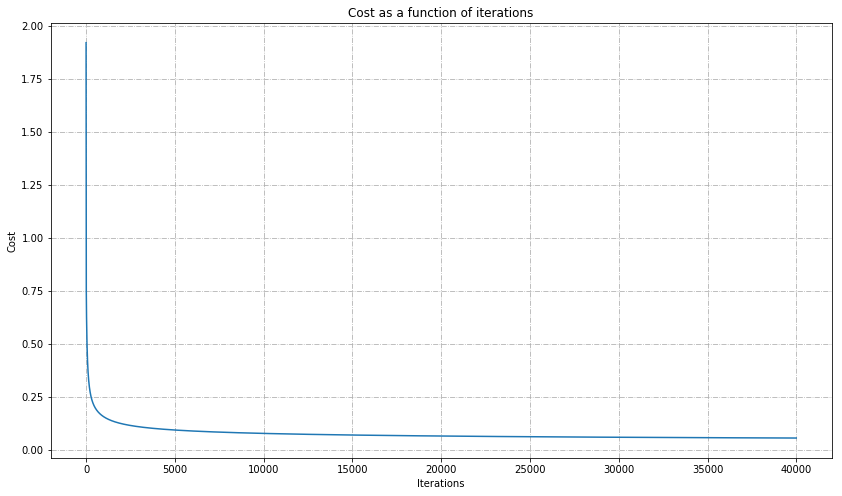

In [148]:
plt.plot(loss)
plt.title('Cost as a function of iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(linestyle='-.')

In [149]:
compute_accuracy(X_test, y_test, theta)

95.91